In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings as w
w.filterwarnings('ignore')

In [9]:
df = pd.read_csv("prague_airbnb_calendar_listing.csv")
df.head()

,Unnamed: 0,id,latitude,longitude,accommodates,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,review_scores_location,review_scores_value,year,month,day,minimum_nights,maximum_nights,available_False,available_True,price
0,0,41586813,50.07889,14.44867,3,1.514108,1.0,4.93000,5.00000,5.000000,...,4.930000,5.000000,2021,11,19,3,99,1,0,133700.0
1,1,20791080,50.09172,14.47377,3,1.000000,1.0,4.88000,5.00000,4.750000,...,4.880000,4.750000,2022,7,5,2,1125,1,0,140000.0
2,2,14210004,50.08459,14.40679,3,1.000000,1.0,4.65293,4.77598,4.711162,...,4.772075,4.694568,2021,11,1,1,999,0,1,234000.0
3,3,11703236,50.08707,14.43441,3,1.000000,2.0,4.20000,4.58000,4.110000,...,4.840000,4.450000,2021,9,12,2,1125,1,0,82300.0
4,4,41079791,50.08976,14.43716,8,2.000000,2.0,4.65293,4.77598,4.711162,...,4.772075,4.694568,2021,9,6,3,1125,0,1,246900.0


In [11]:
df.shape

(254514, 22)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254514 entries, 0 to 254513
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   254514 non-null  int64  
 1   id                           254514 non-null  int64  
 2   latitude                     254514 non-null  float64
 3   longitude                    254514 non-null  float64
 4   accommodates                 254514 non-null  int64  
 5   bedrooms                     254514 non-null  float64
 6   beds                         254514 non-null  float64
 7   review_scores_rating         254514 non-null  float64
 8   review_scores_accuracy       254514 non-null  float64
 9   review_scores_cleanliness    254514 non-null  float64
 10  review_scores_checkin        254514 non-null  float64
 11  review_scores_communication  254514 non-null  float64
 12  review_scores_location       254514 non-null  float64
 13 

In [15]:
df.describe()

,Unnamed: 0,id,latitude,longitude,accommodates,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,review_scores_location,review_scores_value,year,month,day,minimum_nights,maximum_nights,available_False,available_True,price
count,254514.000000,2.545140e+05,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.00000,254514.000000,254514.000000,...,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,2.545140e+05,254514.000000,254514.000000,2.545140e+05
mean,127256.500000,2.608019e+07,50.080769,14.430113,4.130020,1.514108,2.724946,4.65293,4.775980,4.711162,...,4.772075,4.694568,2021.528600,6.523339,15.721681,4.434970,9.757539e+02,0.494232,0.505768,5.032129e+05
std,73472.007544,1.480525e+07,0.018189,0.035709,2.621026,0.897650,2.513836,0.54721,0.353921,0.393883,...,0.311439,0.366053,0.499182,3.443086,8.788582,32.429419,1.079191e+04,0.499968,0.499968,2.006371e+06
min,0.000000,3.884000e+03,49.947830,14.277880,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,...,1.000000,1.000000,2021.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000e+00
25%,63628.250000,1.400326e+07,50.074480,14.416869,2.000000,1.000000,1.000000,4.65000,4.775980,4.690000,...,4.750000,4.670000,2021.000000,4.000000,8.000000,1.000000,3.650000e+02,0.000000,0.000000,1.090000e+05
50%,127256.500000,2.604721e+07,50.082250,14.427360,4.000000,1.000000,2.000000,4.72000,4.820000,4.760000,...,4.800000,4.730000,2022.000000,7.000000,16.000000,2.000000,1.125000e+03,0.000000,1.000000,1.774000e+05
75%,190884.750000,3.933875e+07,50.089200,14.444030,5.000000,2.000000,3.000000,4.91000,4.950000,4.930000,...,4.960000,4.870000,2022.000000,10.000000,23.000000,2.000000,1.125000e+03,1.000000,1.000000,3.292000e+05
max,254513.000000,5.099300e+07,50.167050,14.684160,16.000000,26.000000,54.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,2022.000000,12.000000,31.000000,1000.000000,1.111111e+06,1.000000,1.000000,2.957070e+07


In [16]:
df.duplicated().sum()

0

In [18]:
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,latitude,longitude,accommodates,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,year,month,day,minimum_nights,maximum_nights,available_False,available_True,price
0,50.07889,14.44867,3,1.514108,1.0,4.93000,5.00000,5.000000,4.930000,4.730000,4.930000,5.000000,2021,11,19,3,99,1,0,133700.0
1,50.09172,14.47377,3,1.000000,1.0,4.88000,5.00000,4.750000,4.880000,5.000000,4.880000,4.750000,2022,7,5,2,1125,1,0,140000.0
2,50.08459,14.40679,3,1.000000,1.0,4.65293,4.77598,4.711162,4.815097,4.819511,4.772075,4.694568,2021,11,1,1,999,0,1,234000.0
3,50.08707,14.43441,3,1.000000,2.0,4.20000,4.58000,4.110000,4.500000,4.380000,4.840000,4.450000,2021,9,12,2,1125,1,0,82300.0
4,50.08976,14.43716,8,2.000000,2.0,4.65293,4.77598,4.711162,4.815097,4.819511,4.772075,4.694568,2021,9,6,3,1125,0,1,246900.0


# EDA

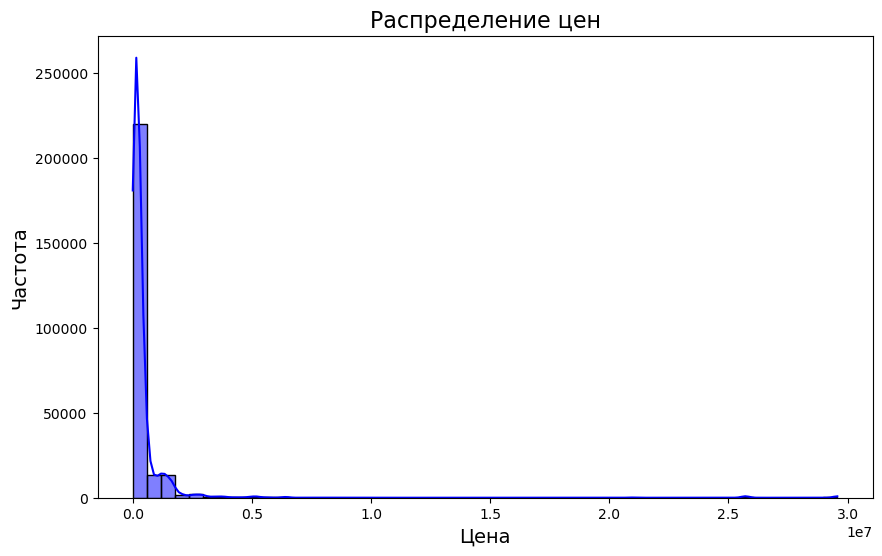

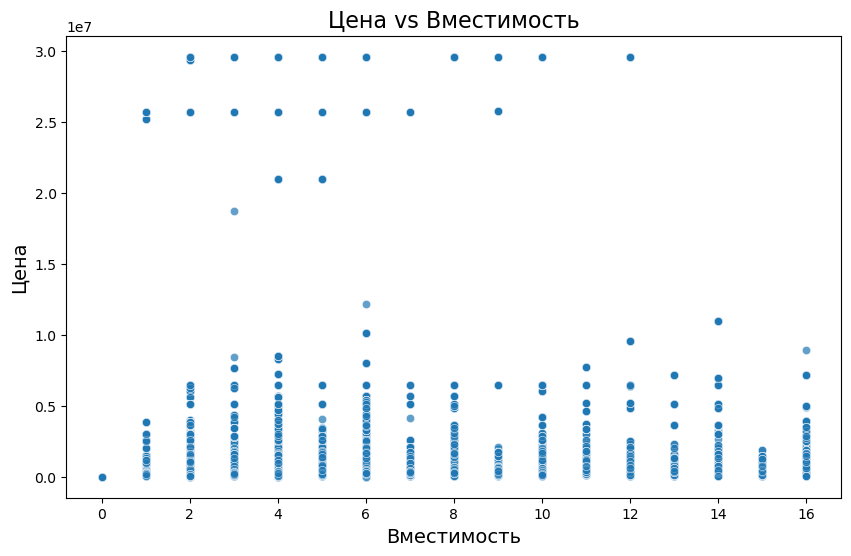

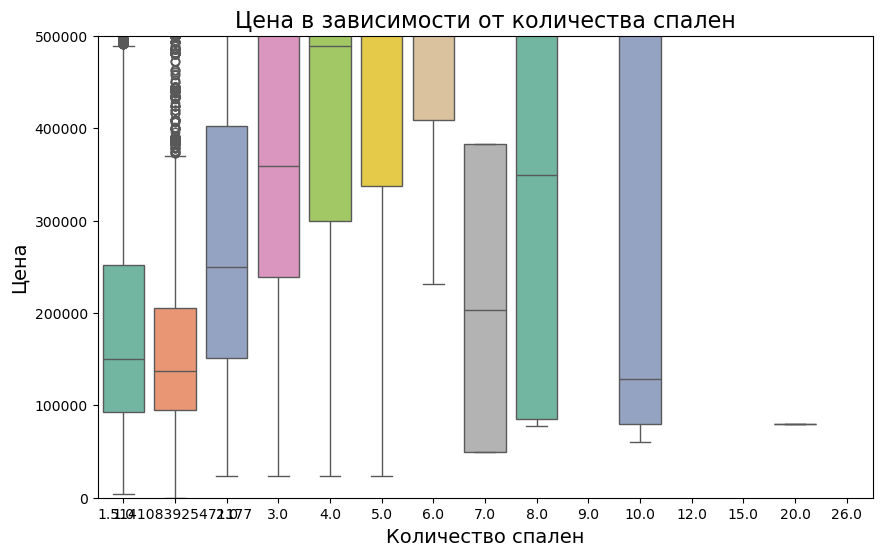

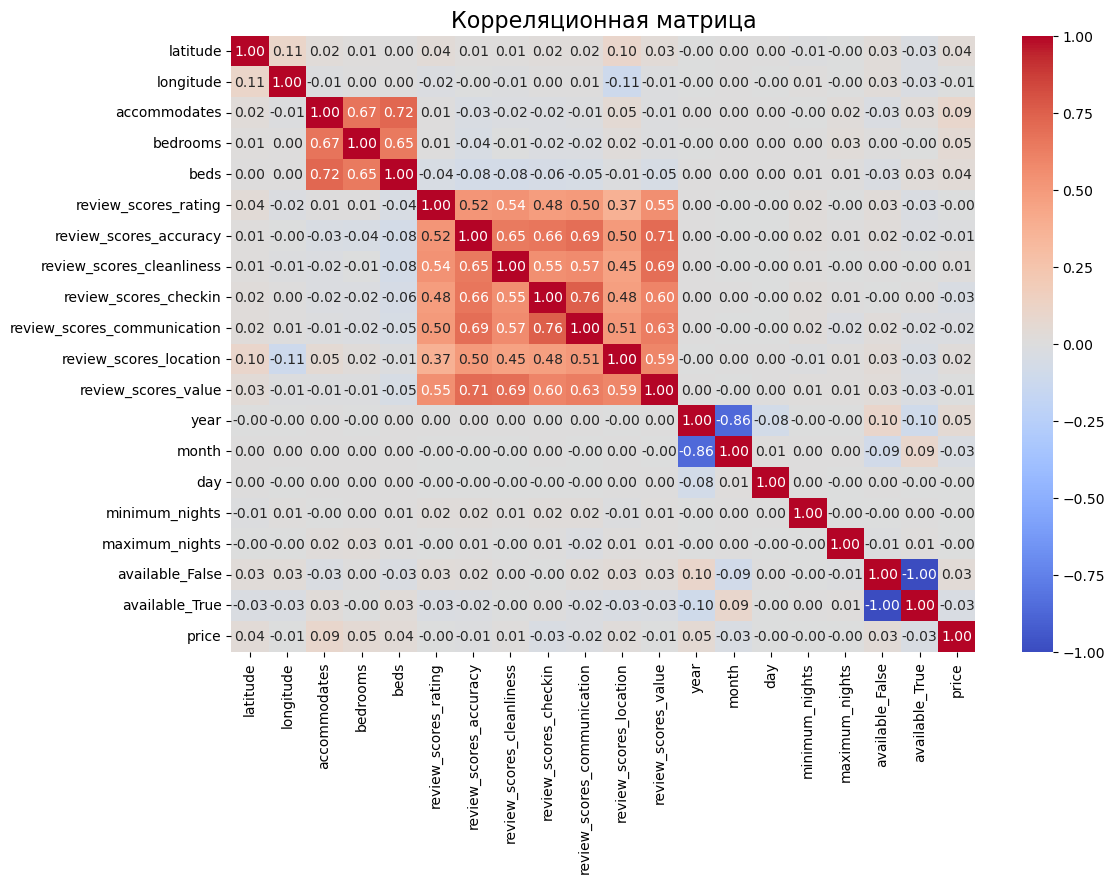

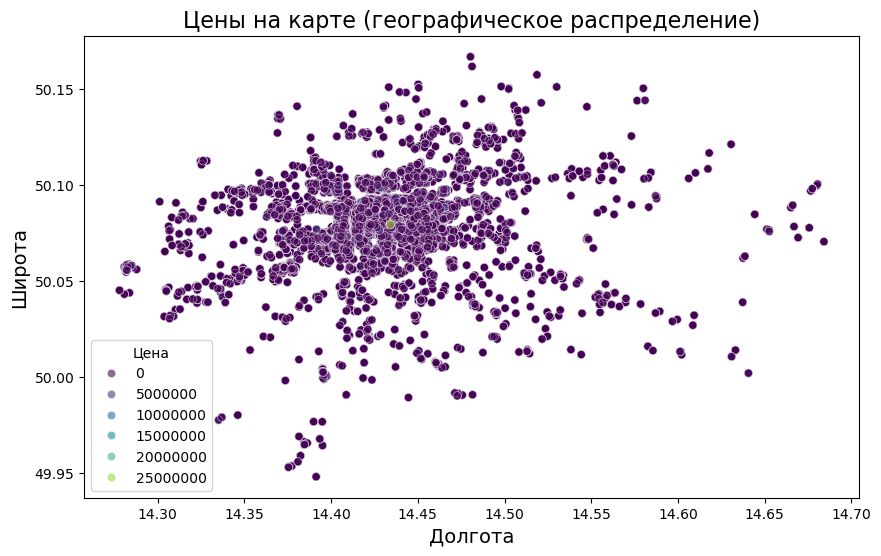

In [22]:

# 1. Гистограмма распределения цен
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Распределение цен', fontsize=16)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

# 2. Точечный график: Зависимость цены от вместимости
plt.figure(figsize=(10, 6))
sns.scatterplot(x='accommodates', y='price', data=df, alpha=0.7)
plt.title('Цена vs Вместимость', fontsize=16)
plt.xlabel('Вместимость', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.show()

# 3. Boxplot: Влияние количества спален на цену
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df, palette='Set2')
plt.title('Цена в зависимости от количества спален', fontsize=16)
plt.xlabel('Количество спален', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.ylim(0, 500000)  # Ограничение для оси Y (при необходимости)
plt.show()

# 4. Корреляционная матрица
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица', fontsize=16)
plt.show()

# 5. Географическая визуализация цен
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', palette='viridis', alpha=0.6, data=df)
plt.title('Цены на карте (географическое распределение)', fontsize=16)
plt.xlabel('Долгота', fontsize=14)
plt.ylabel('Широта', fontsize=14)
plt.legend(title='Цена')
plt.show()


In [23]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Первый квартиль
    Q3 = df[column].quantile(0.75)  # Третий квартиль
    IQR = Q3 - Q1  # Межквартильный размах

    # Определяем границы выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Заменяем выбросы на NaN (или любое другое значение, например медиану)
    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

    # Можно заменить NaN на медиану, если нужно
    df[column].fillna(df[column].median(), inplace=True)

# Применяем обработку выбросов для каждой колонки
df_columns = df.columns
for col in df_columns:
    handle_outliers_iqr(df, col)

print("\nДатафрейм после обработки выбросов:")
df.describe()



Датафрейм после обработки выбросов:


,latitude,longitude,accommodates,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,year,month,day,minimum_nights,maximum_nights,available_False,available_True,price
count,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000,254514.000000
mean,50.082254,14.428499,3.707776,1.395616,2.294639,4.762611,4.851676,4.800605,4.879049,4.886433,4.831658,4.768961,2021.528600,6.523339,15.721681,1.693180,865.351548,0.494232,0.505768,187841.329750
std,0.010102,0.018527,1.735058,0.577236,1.351683,0.169404,0.111498,0.151452,0.099992,0.097708,0.135094,0.142674,0.499182,3.443086,8.788582,0.674097,436.727499,0.499968,0.499968,121209.006183
min,50.052430,14.376190,0.000000,1.000000,0.000000,4.270000,4.520000,4.340000,4.570000,4.570000,4.440000,4.370000,2021.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,50.076430,14.418710,2.000000,1.000000,1.000000,4.652930,4.775980,4.711162,4.815097,4.819511,4.772075,4.694568,2021.000000,4.000000,8.000000,1.000000,365.000000,0.000000,0.000000,109000.000000
50%,50.082560,14.427160,4.000000,1.000000,2.000000,4.760000,4.850000,4.800000,4.880000,4.890000,4.820000,4.750000,2022.000000,7.000000,16.000000,2.000000,1125.000000,0.000000,1.000000,154300.000000
75%,50.088240,14.438950,4.000000,2.000000,3.000000,4.910000,4.950000,4.930000,4.980000,4.990000,4.960000,4.870000,2022.000000,10.000000,23.000000,2.000000,1125.000000,1.000000,1.000000,231400.000000
max,50.111230,14.484750,9.000000,3.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2022.000000,12.000000,31.000000,3.000000,2000.000000,1.000000,1.000000,659000.000000


In [24]:
df.head()

,latitude,longitude,accommodates,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,year,month,day,minimum_nights,maximum_nights,available_False,available_True,price
0,50.07889,14.44867,3.0,1.514108,1.0,4.93000,5.00000,5.000000,4.930000,4.730000,4.930000,5.000000,2021,11,19,3.0,99.0,1,0,133700.0
1,50.09172,14.47377,3.0,1.000000,1.0,4.88000,5.00000,4.750000,4.880000,5.000000,4.880000,4.750000,2022,7,5,2.0,1125.0,1,0,140000.0
2,50.08459,14.40679,3.0,1.000000,1.0,4.65293,4.77598,4.711162,4.815097,4.819511,4.772075,4.694568,2021,11,1,1.0,999.0,0,1,234000.0
3,50.08707,14.43441,3.0,1.000000,2.0,4.76000,4.58000,4.800000,4.880000,4.890000,4.840000,4.450000,2021,9,12,2.0,1125.0,1,0,82300.0
4,50.08976,14.43716,8.0,2.000000,2.0,4.65293,4.77598,4.711162,4.815097,4.819511,4.772075,4.694568,2021,9,6,3.0,1125.0,0,1,246900.0


In [25]:
X=df.drop('price',axis=1)
y=df['price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [28]:
pred = pipeline_xgb.predict(X_test)

In [29]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.6942287316487541
Adjusted R^2: 0.6941145549276748
MAE: 44958.55854036597
MSE: 4480939504.919383
RMSE: 66939.82002455178


In [30]:
pred = pipeline_kn.predict(X_test)

In [31]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.7910819142294381
Adjusted R^2: 0.791003903034547
MAE: 24692.439738325837
MSE: 3061599962.8391256
RMSE: 55331.726548510356


In [32]:
pred = pipeline_rf.predict(X_test)

In [33]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9071050570135888
Adjusted R^2: 0.9070703695164534
MAE: 12299.127077691182
MSE: 1361333332.852192
RMSE: 36896.25093220437


In [34]:
pred = pipeline_dt.predict(X_test)

In [35]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.8439453800529335
Adjusted R^2: 0.8438871083751827
MAE: 12291.085004813076
MSE: 2286909804.2355065
RMSE: 47821.645770879804


In [36]:
pred = pipeline_lr.predict(X_test)

In [37]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.15819820146379548
Adjusted R^2: 0.15788386791089593
MAE: 80230.1584383307
MSE: 12336224246.026995
RMSE: 111068.55651365509


In [39]:
new_data = pd.DataFrame({
    "latitude": [50.09172],
    "longitude": [14.42716],
    "accommodates": [3.0],
    "bedrooms": [1.0],
    "beds": [1.0],
    "review_scores_rating": [4.88],
    "review_scores_accuracy": [4.75],
    "review_scores_cleanliness": [4.77],
    "review_scores_checkin": [4.88],
    "review_scores_communication": [4.81],
    "review_scores_location": [4.9],
    "review_scores_value": [4.7],
    "year": [2025],  
    "month": [1],
    "day": [24],
    "minimum_nights": [2],
    "maximum_nights": [30],
    "available_False": [0],
    "available_True": [1],
})


# Прогнозирование цены
prediction = pipeline_lr.predict(new_data)
print("Предсказанная цена:", prediction[0])

Предсказанная цена: 233467.0708178142
